# Week 6

Ray Hu & Xietao Wang Lin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.stats import maxwell
import pandas as pd
%matplotlib inline
pd.set_option('expand_frame_repr', False)

Parameters

In [2]:
gridPoints = 10

In [3]:
rods = np.loadtxt('rods.dat')
motors = np.loadtxt('motors.dat')
length = np.loadtxt('length_final.dat')
allLengths = np.loadtxt('length_all.dat')

numberOfRods = rods[:, 0].size

def gaussian(x, mu, sigma):
    return 1/((2*math.pi*(sigma**2))**(1/2)) * np.exp((-(x-mu)**2)/(2*(sigma**2)))


In [4]:
def calculateMotorPositions(RodsMatrix, MotorMatrix, numberOfMotors):

    motorPositions = np.zeros(numberOfMotors)
    position = RodsMatrix[0, 0] + MotorMatrix[0, 0]
    motorPositions[0] = position
    for motor in range(1, numberOfMotors):
        position = (RodsMatrix[motor, 0] + MotorMatrix[motor, 0])
        motorPositions[motor] = position
    
    return motorPositions

def plotSystem(RodsMatrix, MotorsMatrix, numberOfRods, gridPoints):

    motorPos = calculateMotorPositions(RodsMatrix, MotorsMatrix, numberOfRods)
    for row in range(0, numberOfRods):
        'Rods'
        y_r = np.ones(gridPoints)*row*0.2
        x_r = np.linspace(RodsMatrix[row, 0], RodsMatrix[row, 0] + RodsMatrix[row, 1], gridPoints, endpoint=True)
        
        plt.plot(x_r, y_r)
        'Motors'
        y_m = row*0.2 + 0.1
        x_m = motorPos[row]
        plt.scatter(x_m, y_m)

    plt.xlabel('x coordinate, motors in dots')
    plt.ylabel('Rods, rod 1 is y = 0, next rod is y += 0.2')
    plt.title('1D System')
    plt.show()

def plotMotorPositions(rods, motors, numberOfRods):

    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 20)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of motors')
    plt.title('Motor distribution')
    plt.show()

def rodMidPointPositions(rods, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints')
    plt.title('Rod distribution')
    plt.show()

def bothPositions(rods, motors, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 10)
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints/motors')
    plt.title('Rod/motor distribution')
    plt.show()

def averageLengthEvolution(allLengths):
    means = np.zeros(allLengths[0, :].size)
    for tstep in range(0, allLengths[0, :].size):
        mean = np.mean(allLengths[:, tstep])
        means[tstep] = mean
    
    plt.plot(np.linspace(0, means.size, means.size), (means))
    plt.xlabel('Time step')
    plt.ylabel('Average length')
    plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
    #plt.plot(np.linspace(0, means.size-150, means.size-150), means[:50])
    plt.show()
    
    

def motorRelativePositions(motors):
    plt.hist(motors[:, 0], 10000, (0,1), density=True)
    plt.show()
    

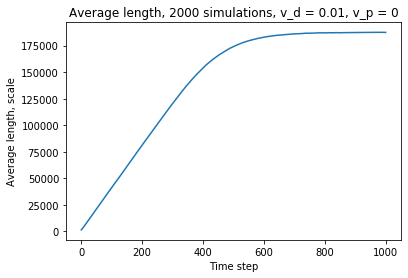

In [5]:

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean
    
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length, scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0')
#plt.plot(np.linspace(1, means.size-150, means.size-150), np.log(means[:50]))
plt.show()

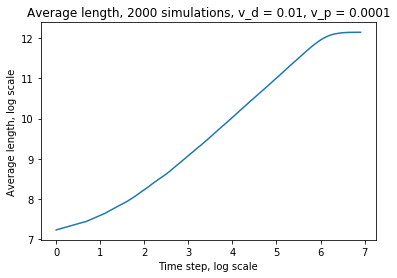

In [6]:
def line(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*np.exp(x) + b*x + c

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#x = np.log(np.linspace(0, means.size-185, means.size-185))
#y = np.log(means[0:15])
plt.plot(np.log(np.linspace(1, means.size, means.size)), np.log(means))
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()
#plt.scatter(x, y)


In [7]:

popt, pcov = curve_fit(quadratic, x, y)
print(f'optimal = {popt}')
a_1, b_1, c_1 = popt
cov_1 = pcov
plt.plot(x, quadratic(x, a_1, b_1, c_1))
print(f'sqrt of cov = {np.sqrt(np.diag(pcov))}')


popt, pcov = curve_fit(line, x, y)
print(f'optimal, line = {popt}')
a_2, b_2 = popt
plt.plot(x, line(x, a_2, b_2))
print(f'sqrt of cov, line = {np.sqrt(np.diag(pcov))}')
plt.show()

plt.scatter(x, np.subtract(quadratic(x, a_1, b_1, c_1), y))
plt.scatter(x, np.subtract(line(x, a_2, b_2), y))
plt.show()

plt.imshow(np.abs(cov_1))
plt.colorbar()
plt.show()


NameError: name 'x' is not defined

In [ ]:
plotSystem(rods, motors, numberOfRods, gridPoints)

In [ ]:
plotMotorPositions(rods, motors, numberOfRods)

In [ ]:
rodMidPointPositions(rods, numberOfRods)

In [ ]:
bothPositions(rods, motors, numberOfRods)

In [ ]:
def lengthDistribution(lengths):

    plt.hist(lengths, 40, density=True)
    plt.xlabel('Length')
    plt.ylabel('Number')
    plt.title('Length distribution')
    params = maxwell.fit(lengths)
    x = np.linspace(1.5, 10, 100)
    plt.plot(x, maxwell.pdf(x, *params))
    plt.show()

lengthDistribution(length)


In [ ]:
means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#print(a,b)
def power_t(x, a, b):
    return np.exp(b)*np.power(x, a)
x = np.linspace(1, means.size-185, means.size-185)
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
#plt.scatter(x, means[:15])
#plt.plot(x, power_t(x, a, b))

plt.show()
#plt.scatter(x, np.subtract(power_t(x, a,b), means[:15]))

In [ ]:
def exp(x, c):
    return np.exp(-c*x)

def line(x, a, b):
    return a*(x-1) + b

motors = np.loadtxt('motors.dat')
plt.hist(motors[:, 0], 30, (0,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))


plt.show()
plt.hist(motors[:, 0], 30, (0.9,1))
print(np.extract(motors[:, 0] <= 0.999, motors).size)

In [ ]:
c = 6
def exp(x, a, b):
    return b*np.exp(a*x)
motors_a = np.loadtxt('motors.dat')
#plt.hist(motors_a[:, 0], 100, (0.7,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))

bin_heights, bin_borders, _ = plt.hist(motors_a[:, 0], bins=10, label='histogram', density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(exp, bin_centers, bin_heights)
a, b = popt
print(f'Best fit: {popt}')
plt.plot(x, exp(x, a, b))
print(f'Covariance: {pcov}')
plt.title('v_p = v_d/180')
plt.xlabel('[0,1]')
plt.ylabel('Frequency')


plt.show()
plt.hist(motors_a[:, 0], 30, (0.9,1), density=True)
print(np.extract(motors_a[:, 0] <= 0.57, motors_a).size)

In [ ]:
def calculateError(allLength):
    errors = np.zeros(allLength[0, :].size)
    for tstep in range(0, allLength[0, :].size):
        error = np.std(allLength[:, tstep])
        errors[tstep] = error
    return errors

error = calculateError(allLengths)/2000

plt.plot((np.linspace(0, error.size, error.size)), (error))
plt.title('std/time graph, log scale')
plt.ylabel('std')
plt.xlabel('time step, log scale')
plt.show()

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

plt.errorbar((np.linspace(1, means.size, means.size)), (means), yerr=error, fmt='o')
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()



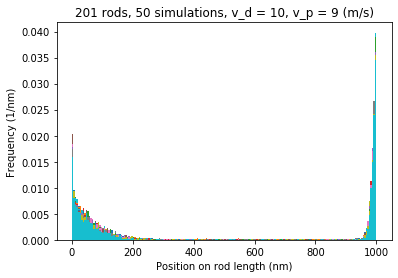

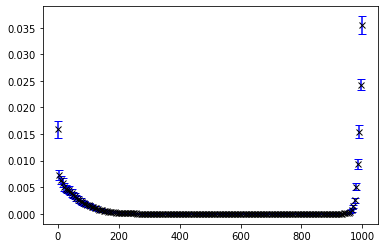

[1.65227277e-03 9.16057110e-04 7.98760178e-04 8.09148389e-04
 7.74560460e-04 6.64381281e-04 5.65402724e-04 7.34971891e-04
 5.85212304e-04 6.78898359e-04 5.87189171e-04 5.88657282e-04
 5.16040343e-04 5.34974514e-04 4.43201448e-04 4.98024006e-04
 4.00603890e-04 4.51597176e-04 3.72098788e-04 4.09619543e-04
 3.07904484e-04 3.55288247e-04 3.29859312e-04 3.27030617e-04
 3.36432437e-04 3.65707840e-04 3.02503667e-04 2.52610712e-04
 3.16474042e-04 2.58025979e-04 2.13668749e-04 2.52705607e-04
 2.20398304e-04 1.69196234e-04 2.03033906e-04 1.91779070e-04
 1.62755964e-04 1.96431680e-04 1.24773506e-04 1.66721915e-04
 1.35121196e-04 1.20289346e-04 9.04865191e-05 1.10235408e-04
 1.21331262e-04 9.08171250e-05 8.05822863e-05 9.99700130e-05
 7.76528720e-05 7.27372530e-05 6.99364545e-05 6.99650175e-05
 6.55720918e-05 4.58028555e-05 4.00299538e-05 5.61502125e-05
 4.48774499e-05 5.93336215e-05 5.86562749e-05 4.14039284e-05
 3.24799137e-05 4.62802075e-05 3.46813625e-05 1.95861249e-05
 3.81384988e-05 4.174035

In [61]:
def exp(x, a, b):
    return b*np.exp(a*x)

def lineal(x, a, b):
    return a*(x-1000) + b
motors_all = np.loadtxt('motors_multiple.dat')

v_d = 10
v_p = 9

bins = 200
start_point = 0

simuls = motors_all[:, 0].size
x = np.linspace(start_point, 1000, bins)
bins_vals = np.zeros((simuls, bins))
y = np.zeros(bins)
y_error = np.zeros(bins)
for i in range(simuls):
    bins_vals[i], bin_borders, _ = plt.hist(motors_all[i], bins, (start_point, 1000), density=True)
    
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod length (nm)')
plt.ylabel('Frequency (1/nm)')

for n in range(bins):
    y[n] = np.mean(bins_vals[:, n])
    y_error[n] = np.std(bins_vals[:, n])

plt.show()
plt.errorbar(x, y, zorder=10000, yerr=y_error, color='black', fmt='x', ecolor='blue', capsize=4)
plt.show()


print(y_error)


c(L) = 0.035500249875062465
B exp(A(x-L)) |     A        |        B          |      L = 1000 nm
Best fit: [0.0017907131496682437, 0.01826780302209498]
Error +-: [0.00016613380241403198, 0.0018565618599432432]
          0
0  9.000000
1 10.000000
2  0.090000
3  0.001791
4  0.018268
5  0.000166
6  0.001857
7  0.035500


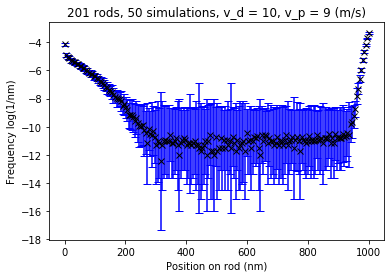

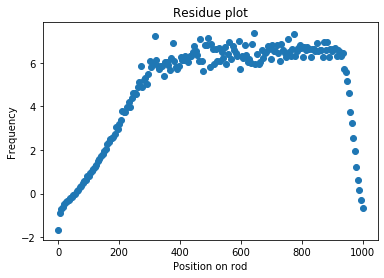

In [63]:
plt.errorbar(x, np.log(y), zorder=10000, yerr=np.divide(y_error,y), color='black', fmt='x', ecolor='blue', capsize=4)
#plt.scatter(x, y, zorder=9999)



epsilon = v_p/(v_d*v_d)
popt, pcov = curve_fit(lineal, x, np.log(y), sigma=np.divide(y_error,y))
a, b = popt
a_e, b_e = np.sqrt(np.diag(pcov))
b_e = np.exp(b)*b_e
print(f'c(L) = {y[-1]}')
print('B exp(A(x-L)) |     A        |        B          |      L = 1000 nm')
print(f'Best fit: {[a, np.exp(b)]}')
print(f'Error +-: {[a_e, b_e]}')
#plt.scatter(x, lineal(x, a, b), color='r')

result = [v_p, v_d, epsilon, a, np.exp(b), a_e, b_e, y[-1]]
r_df = pd.DataFrame(result)
r_df.to_clipboard(index=False, header=None)
print(r_df)
"""
theory = np.array([9.00, np.log(y[-1])-9])
plt.scatter(x, lineal(x, theory[0], theory[1]), color='green')
"""

"""
print(f'Theory  : {theory}')
"""
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod (nm)')
plt.ylabel('Frequency log(1/nm)')
plt.show()

plt.title('Residue plot')
plt.xlabel('Position on rod')
plt.ylabel('Frequency')
plt.scatter(x, lineal(x, a, b)-np.log(y))
plt.show()

In [8]:
df = pd.read_csv('LinealGauss_2.csv', header=None, index_col=0)
pd.options.display.float_format = '{:,.6f}'.format
df = df.transpose()
df

,v_p,v_d,epsilon,A,B,A_error,B_error,c(L),l_tr,B-c(L) (%),epsilon - c(L) (%),A - B (%),B + epsilon*1000-2,B -0.5 - epislon*1000/12,epsilon *1000,e^-epL + 1 - B
1,1.000000,10.000000,0.010000,0.013454,0.011652,0.000125,0.000105,0.011638,nan,0.001172,0.140765,0.154637,9.665354,-1.457538,10.000000,1.000045
2,1.000000,20.000000,0.002500,0.003459,0.003310,0.000028,0.000028,0.003322,nan,0.003456,0.247394,0.045067,1.313771,-0.772400,2.500000,1.078775
3,1.000000,5.000000,0.040000,0.053037,0.046268,0.000890,0.000791,0.044572,nan,0.038052,0.102574,0.146301,44.321022,-4.302628,40.000000,0.953732
4,2.000000,10.000000,0.020000,0.026733,0.023064,0.000299,0.000280,0.022613,nan,0.019952,0.115550,0.159073,21.090845,-2.395276,20.000000,0.976936
5,4.000000,10.000000,0.040000,0.048332,0.041934,0.002309,0.002054,0.038169,nan,0.098639,0.047970,0.152568,39.982295,-3.946165,40.000000,0.958066
6,0.250000,10.000000,0.002500,0.003509,0.003369,0.000048,0.000046,0.003392,nan,0.006624,0.262894,0.041594,1.372683,-0.777255,2.500000,1.078716
7,9.000000,10.000000,0.090000,0.090003,0.079116,0.003973,0.003410,0.074723,nan,0.058795,0.204453,0.137608,77.206015,-7.002998,90.000000,0.920884
8,1.000000,3.333333,0.090000,0.113826,0.101939,0.003125,0.003127,0.095270,nan,0.070006,0.055315,0.116601,100.053208,-8.881123,90.000000,0.898061
9,1.000000,7.071070,0.020000,0.026584,0.024647,0.000395,0.000391,0.024072,nan,0.023906,0.169143,0.078594,22.673548,-2.527330,19.999988,0.975353


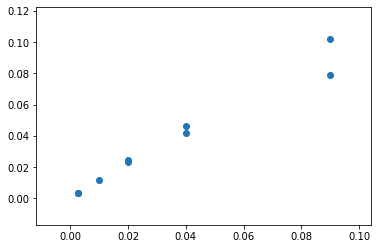

In [9]:
plt.scatter(df['epsilon'], df['B'])

[1.         1.         1.         1.         0.9800995  0.90547264
 0.7761194  0.70149254 0.57711443 0.53233831 0.4079602  0.45273632
 0.35820896 0.28358209 0.28358209 0.17412935 0.17910448 0.13930348
 0.12437811 0.16915423 0.08955224 0.13930348 0.08457711 0.08457711
 0.10447761 0.10447761 0.05472637 0.07960199 0.05970149 0.05472637
 0.06965174 0.06467662 0.04477612 0.08457711 0.03482587 0.04477612
 0.04477612 0.02487562 0.04975124 0.05472637]


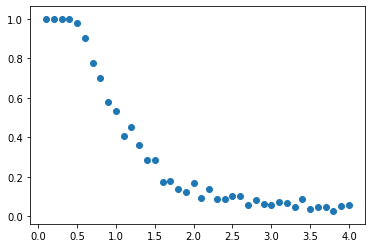

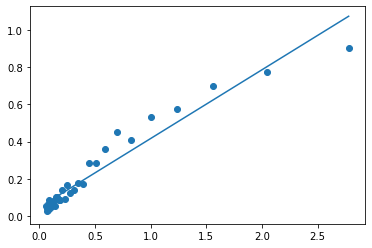

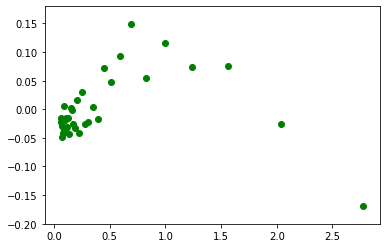

9.65155458892443 0.020302334983616947


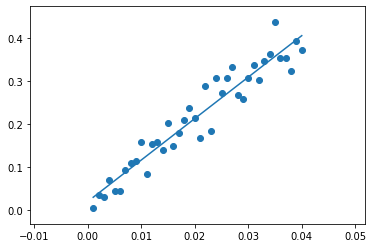

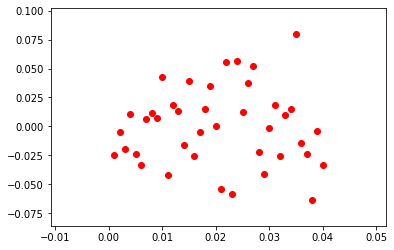

In [20]:
def regression(x, a, b):
    return a*x+b
v_p_change = np.loadtxt('v_p_change.dat')
v_d_change = np.loadtxt('v_d_change.dat')
x = np.linspace(0.1, 4, 40)
x_2 = np.linspace(0.1, 20, 40)
x_e_1 = x/100
x_e_2 = np.divide(10, np.multiply(x_2, x_2))

plt.scatter(x, v_d_change)
print(v_d_change)
plt.show()

filtered = np.extract(v_d_change <= 0.91, v_d_change)
filter_x = np.linspace(0.6, 4, filtered.size)
filter_e = np.divide(1, np.multiply(filter_x, filter_x))
plt.scatter(filter_e, filtered)
popt, pcov = curve_fit(regression, filter_e, filtered)
a, b = popt
plt.plot(filter_e, regression(filter_e, a, b))
plt.show()
plt.scatter(filter_e, -regression(filter_e, a, b)+filtered, color='g')
plt.show()
plt.scatter(x_e_1, v_p_change)
popt, pcov = curve_fit(regression, x_e_1, v_p_change)
a, b = popt
plt.plot(x_e_1, regression(x_e_1, a, b))
print(a, b)
plt.show()
plt.scatter(x_e_1, v_p_change-regression(x_e_1, a, b), color='r')
plt.show()